# The Sparks Foundation: Task #1
## Data Science and Business Analytics

### Problem statement: Predict the percentage of marks of an student based on the number of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

### Data can be found at http://bit.ly/w-data


In [35]:
"""
importing required libraries
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection

In [37]:
"""
#loading the dataset from given url
"""
data = pd.read_csv("http://bit.ly/w-data")

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Visualization

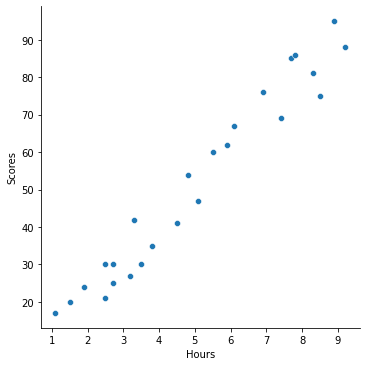

In [7]:
"""
score distribution plotting
"""
sns.relplot(data=data, x='Hours', y='Scores')

### Seems like Score is directly proportional to no. of hours of study.

In [8]:
"""
preparing dataset
"""
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [13]:
"""
splitting the dataset into training and testing data
"""
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Applying Machine Learning Algorithm

In [15]:
"""
fitting the training data 
"""
from sklearn.linear_model import LinearRegression  
linear_reg = LinearRegression()  
linear_reg.fit(X_train, y_train) 

LinearRegression()

In [18]:
"""
slope of the line i.e. coefficient
"""
m = linear_reg.coef_

In [19]:
"""
intercept of the line
"""
c = linear_reg.intercept_

In [20]:
"""
line equation
"""
line = m * X + c

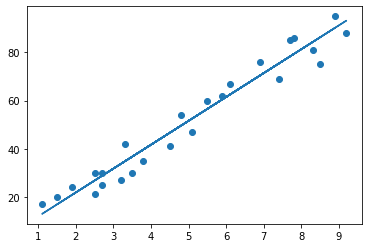

In [22]:
"""
plotting the regression line against the dataset
"""
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [66]:
comparison_table = pd.DataFrame({'Hours': X_test.reshape(-1), 'Actual Score': y_test, 'Predicted Score': y_pred})

In [67]:
"""
Actual score VS Predicted score
"""
comparison_table

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [39]:
"""
predicting the score for given hours of study
"""
my_score = np.array(9.25)
my_score = my_score.reshape(1, -1)

predict_score = linear_reg.predict(my_score)
print("Predicted Score for 9.25 hrs of study : ",predict_score[0])

Predicted Score for 9.25 hrs of study :  93.69173248737539


In [52]:
"""
Evaluation
"""
from sklearn import metrics  
print('Mean Absolute Error :', 
      metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error : 4.183859899002982
Mean Squared Error :  21.598769307217456


In [54]:
"""
Accuracy of the model
"""
print("Accuracy: ", metrics.r2_score(y_test,y_pred))

Accuracy:  0.9454906892105354
